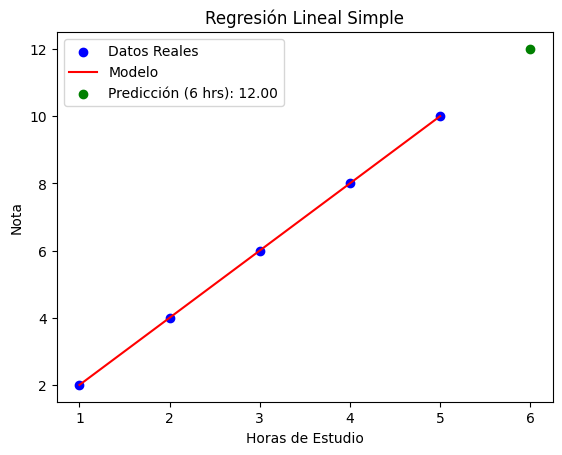

Predicción para 6 horas de estudio: 12.00


In [2]:
# Importamos las librerías necesarias
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados
X = np.array([[1], [2], [3], [4], [5]])  # Horas de estudio
y = np.array([2, 4, 6, 8, 10])  # Notas obtenidas

# Creamos y entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Realizamos una predicción
prediccion = modelo.predict([[6]])

# Visualización de los datos y la predicción
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X, modelo.predict(X), color='red', label='Modelo')
plt.scatter(6, prediccion, color='green', label=f'Predicción (6 hrs): {prediccion[0]:.2f}')
plt.xlabel('Horas de Estudio')
plt.ylabel('Nota')
plt.legend()
plt.title('Regresión Lineal Simple')
plt.show()

print(f'Predicción para 6 horas de estudio: {prediccion[0]:.2f}')


In [3]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Datos simulados
X = np.array([[1], [2], [3], [4], [5]])  # Horas de estudio
y = np.array([0, 0, 1, 1, 1])  # 0 = No aprueba, 1 = Aprueba

# Crear y entrenar el modelo
modelo_log = LogisticRegression()
modelo_log.fit(X, y)

# Predicción
prediccion = modelo_log.predict([[3]])
probabilidad = modelo_log.predict_proba([[3]])

print(f'¿Aprobará con 3 horas de estudio? {"Sí" if prediccion[0] else "No"}')
print(f'Probabilidad de aprobar: {probabilidad[0][1]:.2f}')


¿Aprobará con 3 horas de estudio? Sí
Probabilidad de aprobar: 0.65


In [4]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# Datos simulados
y_true = [0, 1, 1, 0, 1, 0, 1, 1]
y_pred = [0, 1, 0, 0, 1, 1, 1, 0]

# Cálculo de métricas
precision = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
matriz_confusion = confusion_matrix(y_true, y_pred)

print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Matriz de Confusión:\n{matriz_confusion}')


Precisión: 0.62
Recall: 0.60
F1-Score: 0.67
Matriz de Confusión:
[[2 1]
 [2 3]]


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Cargamos un dataset de ejemplo
iris = load_iris()
X, y = iris.data, iris.target

# Entrenamos un árbol de decisión
modelo = DecisionTreeClassifier()
resultados = cross_val_score(modelo, X, y, cv=5)

print(f'Puntajes de Validación Cruzada: {resultados}')
print(f'Precisión Promedio: {np.mean(resultados):.2f}')


Puntajes de Validación Cruzada: [0.96666667 0.96666667 0.9        1.         1.        ]
Precisión Promedio: 0.97


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Generamos datos aleatorios
X = np.random.rand(100, 5)
y = (X[:, 0] + X[:, 1] * 2 + np.random.randn(100) * 0.1 > 1).astype(int)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Modelo sobreajustado
modelo_overfit = DecisionTreeClassifier(max_depth=None)
modelo_overfit.fit(X_train, y_train)

# Evaluación del modelo
train_acc = accuracy_score(y_train, modelo_overfit.predict(X_train))
test_acc = accuracy_score(y_test, modelo_overfit.predict(X_test))

print(f'Precisión en Entrenamiento (Sobreajuste): {train_acc:.2f}')
print(f'Precisión en Prueba (Sobreajuste): {test_acc:.2f}')


Precisión en Entrenamiento (Sobreajuste): 1.00
Precisión en Prueba (Sobreajuste): 0.93


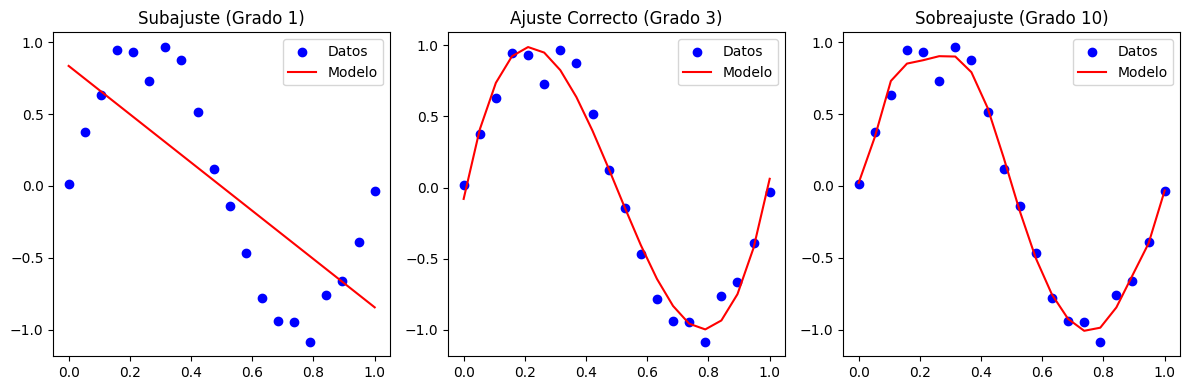

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Datos simulados
X = np.linspace(0, 1, 20).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Modelos con distintos grados de complejidad
modelos = {
    'Subajuste (Grado 1)': PolynomialFeatures(degree=1),
    'Ajuste Correcto (Grado 3)': PolynomialFeatures(degree=3),
    'Sobreajuste (Grado 10)': PolynomialFeatures(degree=10)
}

plt.figure(figsize=(12, 4))
for i, (nombre, poly) in enumerate(modelos.items()):
    X_poly = poly.fit_transform(X)
    modelo = LinearRegression().fit(X_poly, y)
    y_pred = modelo.predict(X_poly)
    
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='blue', label='Datos')
    plt.plot(X, y_pred, color='red', label='Modelo')
    plt.title(nombre)
    plt.legend()

plt.tight_layout()
plt.show()


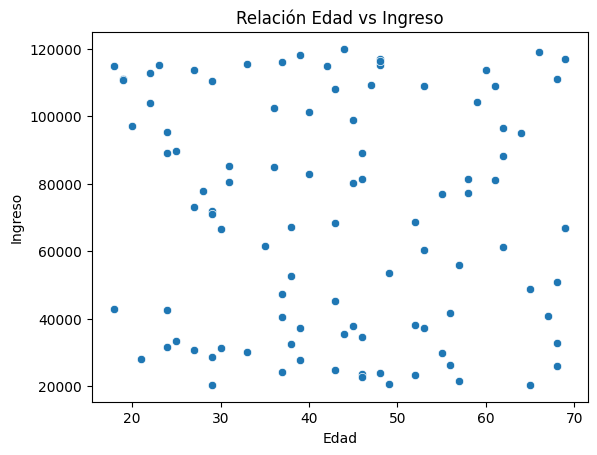

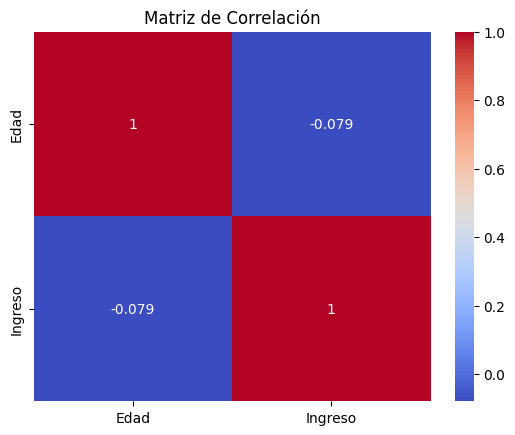

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Datos simulados
data = pd.DataFrame({
    'Edad': np.random.randint(18, 70, 100),
    'Ingreso': np.random.randint(20000, 120000, 100)
})

# Scatter plot
sns.scatterplot(x='Edad', y='Ingreso', data=data)
plt.title('Relación Edad vs Ingreso')
plt.show()

# Heatmap de correlación
correlacion = data.corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
